<a href="https://colab.research.google.com/github/Viroslav/CV_eng_task/blob/main/CV_eng_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imports

In [1]:
! pip install requests_html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 2.9 MB/s eta 0:00:00
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=10e0a38bfff93868505971edd2aa529b1b2c0deda4877132d15ee78722f0fdfa
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
Successfully built parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [22]:
from bs4 import BeautifulSoup
import requests
import random
from requests_html import HTMLSession
import tqdm
import shutil
import os
import time
from fake_useragent import UserAgent

## copying website in case of 403 error or captcha

In [23]:
session = HTMLSession()
useragent = UserAgent()

In [24]:
link = 'https://www.ralphlauren.nl/en/men/clothing/hoodies-sweatshirts/10204?webcat=men%7Cclothing%7Cmen-clothing-hoodies-sweatshirts'

In [25]:
header = {
    'authority': 'www.ralphlauren.nl',
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

In [ ]:
res = session.get(link, headers=header)
if res.status_code != 200:
  print(" Опять капча( ")
with open("ralph.html", 'w') as file:
  file.write(res.text)
with open("ralph.html", 'r') as file:
  site = file.read()

 Опять капча( 


In [ ]:
with open("ralph.html", 'r') as file:
  site = file.read()
with open("ralph1.html", 'r') as file:
  site1 = file.read()
with open("ralph2.html", 'r') as file:
  site2 = file.read()
with open("ralph3.html", 'r') as file:
  site3 = file.read()
with open("ralph4.html", 'r') as file:
  site4 = file.read()

In [ ]:
soup = BeautifulSoup(site, 'lxml')
all = soup.find_all(class_='pagination')
for i in all:
  need = i.find('div', class_='pagination-flex').find(class_="more-button button inverse").get('href')
  res1 = requests.get(need, headers=header)
with open("ralph1.html", 'w') as file:
  file.write(res1.text)
with open("ralph1.html", 'r') as file:
  site1 = file.read()

In [ ]:
soup = BeautifulSoup(site1, 'lxml')
all = soup.find_all(class_='pagination')
for i in all:
  need = i.find('div', class_='pagination-flex').find(class_="more-button button inverse").get('href')
  res2 = requests.get(need, headers=header)
with open("ralph2.html", 'w') as file:
  file.write(res2.text)
with open("ralph2.html", 'r') as file:
  site2 = file.read()

In [ ]:
soup = BeautifulSoup(site2, 'lxml')
all = soup.find_all(class_='pagination')
for i in all:
  need = i.find('div', class_='pagination-flex').find(class_="more-button button inverse").get('href')
  res3 = requests.get(need, headers=header)
with open("ralph3.html", 'w') as file:
  file.write(res3.text)
with open("ralph3.html", 'r') as file:
  site3 = file.read()

In [ ]:
soup = BeautifulSoup(site3, 'lxml')
all = soup.find_all(class_='pagination')
for i in all:
  need = i.find('div', class_='pagination-flex').find(class_="more-button button inverse").get('href')
  res4 = requests.get(need, headers=header)
with open("ralph4.html", 'w') as file:
  file.write(res4.text)
with open("ralph4.html", 'r') as file:
  site4 = file.read()

In [ ]:
soup = BeautifulSoup(site4, 'lxml')
all = soup.find_all(class_='pagination')

In [ ]:
j = 0
res = requests.get(link, headers=header)
with open("ralph.html", 'w') as file:
  file.write(res.text)
with open("ralph.html", 'r') as file:
  site = file.read()


while all != []:
  soup = BeautifulSoup(site, 'lxml')
  all = soup.find_all(class_='pagination')
  for i in all:
    need = i.find('div', class_='pagination-flex').find(class_="more-button button inverse").get('href')
    res = requests.get(need, headers=header)
  with open(f"ralph{j}.html", 'w') as file:
    file.write(res.text)
  with open(f"ralph{j}.html", 'r') as file:
    site = file.read()
  j += 1

[]

In [ ]:
site_list=[site, site1, site2, site3, site4]
urls = []

## getting links for all clothes

In [ ]:
for st in site_list:
  soup = BeautifulSoup(st, 'lxml')
  all = soup.find_all(class_='search-result-main-section')
  for i in all:
    data = i.find(class_="primary-content toggled-layout full-width") \
           .find(class_='search-result-content') \
           .find(id="search-result-items").find_all(class_=" grid-tile js-category-grid-product ingridOneByOne ")
  for j in data:
    try:
      urls.append(j.find(class_="product-tile").get('data-monetate-producturl'))
    except:
      pass

In [ ]:
len(urls)

144

## getting free proxy

In [ ]:
import threading
import queue

q = queue.Queue()
valid_proxies = []


with open("/content/proxies.txt", "r") as f:
    proxies = f.read().split("\n")
    for pr in proxies:
        q.put(pr)


def check_proxy():
    global q
    while not q.empty():
        proxy = q.get()
        try:
            res = requests.get('http://ipinfo.io/json',
                               proxies = {"http" :proxy,
                                          "https":proxy})
        except:
            continue
        if res.status_code == 200:
            print(proxy)

for t in range(20):
    threading.Thread(target=check_proxy).start()

110.164.15.182:8080
139.59.1.14:3128
188.0.147.102:3128
43.129.223.147:38080
198.49.68.80:80
159.203.61.169:8080
198.52.117.208:8080
172.177.221.87:80
47.88.87.74:1080
35.221.104.58:3128


In [ ]:
with open("/content/valid_proxies.txt", "r") as f:
    proxies = f.read().split("\n")

In [ ]:
k = 0
while k < len(proxies):
    try:
        print(f'using: {proxies[k]}')
        req = requests.get('http://ipinfo.io/json', proxies = {"http": proxies[k], "https": proxies[k]})
        soup = BeautifulSoup(req.text, 'lxml')
        ip = soup.find('div', class_='ip').text.strip()
        print(ip)
    except:
        print('invalid')
    finally:
        k+=1  

using: 110.164.15.182:8080
invalid
using: 139.59.1.14:3128
invalid
using: 188.0.147.102:3128
invalid
using: 43.129.223.147:38080
invalid
using: 198.49.68.80:80
invalid
using: 159.203.61.169:8080
invalid
using: 198.52.117.208:8080
invalid
using: 172.177.221.87:80
invalid
using: 47.88.87.74:1080
invalid
using: 35.221.104.58:3128
invalid


## links for all colors

In [ ]:
urls_with_colors = []

In [ ]:
for url in tqdm.tqdm(urls[42:][42:][42:]):
  print(f"downloading from {url}")
  ft = requests.get(url, headers=header)
  if ft.status_code != 200:
        print("  Опять_капча( ", ft.status_code)
        while ft.status_code != 200:
            header['user-agent'] = useragent.ie
            ft = requests.get(url, headers = header, proxies=proxy)
            if ft.status_code == 200:
                print('succes')
            else:
                print('trying again')
                print(header)
            time.sleep(2)
  soup = BeautifulSoup(ft.text, 'lxml')
  all = soup.find_all(class_='swiper-wrapper refresh-swatches attribute-list attribute-selected swatches color-swatches colorname ')
  time.sleep(1)
  for i in all:
    q = i.find_all("a")
  for b in q:
    for_appending = b.get("href")
    print(for_appending)
    urls_with_colors.append(for_appending)

In [ ]:
file = open('/content/items.txt','w')
for item in urls_with_colors:
	file.write(item+"\n")
file.close()

## aggregating all together

In [ ]:
total_list_of_links = []
for file in os.listdir("/content/list/"):
    if file.endswith(".txt"):
        name = '/content/list/' + file
        print(f"merging{name}")
        with open(name, 'r') as file:
            total_list_of_links += file.read().split("\n")
            print(len(total_list_of_links))

merging/content/list/items1.txt
62
merging/content/list/items.txt
144
merging/content/list/items (2).txt
167
merging/content/list/items (1).txt
235


## mount drive and save all possible links, prepairing for downloading all items in all colors

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
    os.mkdir("/content/drive/MyDrive/Test_1/items")
    os.mkdir("/content/drive/MyDrive/Test_1/people")
    os.mkdir("/content/drive/MyDrive/Test_1/")
except:
    pass

file = open('/content/drive/MyDrive/Test_1/all_links.txt','w')
for item in total_list_of_links:
	file.write(item+"\n")
file.close()


In [ ]:
total_list_of_links = []
for file in os.listdir('/content/drive/MyDrive/Test_1/'):
    if file.endswith(".txt"):
        name = '/content/drive/MyDrive/Test_1/' + file
        print(f"merging{name}")
        with open(name, 'r') as file:
            total_list_of_links += file.read().split("\n")
for j in total_list_of_links:
    if j == '':
        total_list_of_links.remove(j)

merging/content/drive/MyDrive/Test_1/all_links.txt


## download

In [ ]:
k = 0
for link in tqdm.tqdm(total_list_of_links):
    time.sleep(2)
    try:
        ft = requests.get(link, headers = header)

        if ft.status_code != 200:
            print("  Опять_капча( ", ft.status_code)
            while ft.status_code != 200:
                header['user-agent'] = useragent.ie
                ft = requests.get(link, headers = header)
                print('changing_header')

        soup = BeautifulSoup(ft.text, 'lxml')
        all = soup.find_all("div", class_="product-col-1 product-image-container use-gridimgbgColor ")

        for i in all:
            high = i.find_all(class_="swiper-zoomable")

        for num, elem in enumerate(high):
            link = elem.get('data-highres-images')
            img_data = requests.get(link, headers = header).content

            # separate pics by 2 folders
            if num == 1:
                with open(f'/content/drive/MyDrive/Test_1/items/image_00{k}.jpg', 'wb') as img:
                    img.write(img_data)
                    k+=1
            else:
                with open(f'/content/drive/MyDrive/Test_1/people/image_00{k}.jpg', 'wb') as img:
                    img.write(img_data)
                    k+=1
    except:
      continue

In [ ]:
k

361

In [ ]:
k = 361
for link in tqdm.tqdm(total_list_of_links[73:]):
    time.sleep(2)
    try:
        ft = requests.get(link, headers = header)

        if ft.status_code != 200:
            print("  Опять_капча( ", ft.status_code)
            while ft.status_code != 200:
                header['user-agent'] = useragent.ie
                ft = requests.get(link, headers = header)
                print('changing_header')

        soup = BeautifulSoup(ft.text, 'lxml')
        all = soup.find_all("div", class_="product-col-1 product-image-container use-gridimgbgColor ")

        for i in all:
            high = i.find_all(class_="swiper-zoomable")

        for num, elem in enumerate(high):
            link = elem.get('data-highres-images')
            img_data = requests.get(link, headers = header).content

            # separate pics by 2 folders
            if num == 1:
                with open(f'/content/drive/MyDrive/Test_1/items/image_00{k}.jpg', 'wb') as img:
                    img.write(img_data)
                    k+=1
            else:
                with open(f'/content/drive/MyDrive/Test_1/people/image_00{k}.jpg', 'wb') as img:
                    img.write(img_data)
                    k+=1
    except:
      continue

 19%|█▉        | 30/159 [04:48<21:52, 10.17s/it]

  Опять_капча(  403
changing_header


 38%|███▊      | 60/159 [09:01<15:36,  9.46s/it]

  Опять_капча(  403
changing_header


 38%|███▊      | 61/159 [09:08<14:16,  8.74s/it]

  Опять_капча(  403
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header


 39%|███▉      | 62/159 [09:14<14:27,  8.95s/it]


KeyboardInterrupt: ignored

In [ ]:
k

663

In [ ]:
k = 663
for link in tqdm.tqdm(total_list_of_links[73:][61:]):
    time.sleep(2)
    try:
        ft = requests.get(link, headers = header)

        if ft.status_code != 200:
            print("  Опять_капча( ", ft.status_code)
            while ft.status_code != 200:
                header['user-agent'] = useragent.ie
                ft = requests.get(link, headers = header)
                print('changing_header')

        soup = BeautifulSoup(ft.text, 'lxml')
        all = soup.find_all("div", class_="product-col-1 product-image-container use-gridimgbgColor ")

        for i in all:
            high = i.find_all(class_="swiper-zoomable")

        for num, elem in enumerate(high):
            link = elem.get('data-highres-images')
            img_data = requests.get(link, headers = header).content

            # separate pics by 2 folders
            if num == 1:
                with open(f'/content/drive/MyDrive/Test_1/items/image_00{k}.jpg', 'wb') as img:
                    img.write(img_data)
                    k+=1
            else:
                with open(f'/content/drive/MyDrive/Test_1/people/image_00{k}.jpg', 'wb') as img:
                    img.write(img_data)
                    k+=1
    except:
      continue

 29%|██▊       | 28/98 [02:57<07:08,  6.12s/it]

  Опять_капча(  410
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header
changing_header


 30%|██▉       | 29/98 [03:18<07:52,  6.84s/it]


KeyboardInterrupt: ignored

In [ ]:
k

810

In [ ]:
k = 839
for link in tqdm.tqdm(total_list_of_links[73:][61:][38:]):
    time.sleep(3)
    try:
        ft = requests.get(link, headers = header)

        if ft.status_code != 200:
            print("  Опять_капча( ", ft.status_code)
            while ft.status_code != 200:
                header['user-agent'] = useragent.ie
                ft = requests.get(link, headers = header)
                print('changing_header')

        soup = BeautifulSoup(ft.text, 'lxml')
        all = soup.find_all("div", class_="product-col-1 product-image-container use-gridimgbgColor ")

        for i in all:
            high = i.find_all(class_="swiper-zoomable")

        for num, elem in enumerate(high):
            link = elem.get('data-highres-images')
            img_data = requests.get(link, headers = header).content

            # separate pics by 2 folders
            if num == 1:
                with open(f'/content/drive/MyDrive/Test_1/items/image_00{k}.jpg', 'wb') as img:
                    img.write(img_data)
                    k+=1
            else:
                with open(f'/content/drive/MyDrive/Test_1/people/image_00{k}.jpg', 'wb') as img:
                    img.write(img_data)
                    k+=1
    except:
      continue

 50%|█████     | 30/60 [04:27<04:28,  8.95s/it]

  Опять_капча(  403
changing_header


100%|██████████| 60/60 [08:28<00:00,  8.48s/it]


## Selenium(don't chek, just if curious) (тут пробовал обходить блоки)

In [ ]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%shell

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

apt-get update
apt-get install chromium-driver

pip install selenium

Executing: /tmp/apt-key-gpghome.NavqRXmFDt/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.JTvtnUS19v/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.L5xgMfTmOz/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
! pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:
def driver_in():
    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument('--disable-dve-shm-uage')

    return webdriver.Chrome(executable_path='/content/driver/chromedriver', options=options)

In [ ]:
urlq = 'https://sqa.stackexchange.com/questions/26061/how-can-i-get-the-value-from-div-class-in-selenium-webdriver'
driver = driver_in()
try:
    driver.get(urlq)
    driver.find_elements(By.CLASS_NAME, "wmx100 mx-auto my8 h-auto d-block")
except Exception as _ex:
    print(_ex)  
finally:
    driver.close()
    driver.quit()

<ipython-input-274-e4a93545d66b>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  return webdriver.Chrome(executable_path='/content/driver/chromedriver', options=options)


In [ ]:
driver.close()

In [ ]:
for element in driver.find_elements(By.XPATH, "//div[@class='product-col-1 product-image-container use-gridimgbgColor ']"):
    print(element.text)

In [ ]:
driver.find_elements(By.XPATH,'//div[@class="swiper-wrapper refresh-swatches attribute-list attribute-selected swatches color-swatches colorname "]')

[]

In [ ]:
  for element in driver.find_elements(By.XPATH, '//div[@class_="swiper-wrapper refresh-swatches attribute-list attribute-selected swatches color-swatches colorname "]'):
    print(element.text)

In [ ]:
for url in tqdm.tqdm(urls):
  print(f"downloading from {url}")
  try:
      driver.get(url)
      time.sleep(5)
  except Exception as _ex:
      print(_ex)  
  finally:
      driver.close()
      driver.quit()



  0%|          | 0/131 [00:00<?, ?it/s]

downloading from https://www.ralphlauren.nl/en/textured-crewneck-86347.html?dwvar_86347_colorname=Faded%20Black%20Canvas&cgid=men-clothing-hoodies-sweatshirts&webcat=men/clothing/men clothing hoodies sweatshirts


  1%|          | 1/131 [00:02<05:38,  2.60s/it]

downloading from https://www.ralphlauren.nl/en/indigo-jacquard-knit-henley-394484.html?dwvar_394484_colorname=Washed%20Blue%20Indigo&cgid=men-clothing-hoodies-sweatshirts&webcat=men/clothing/men clothing hoodies sweatshirts
HTTPConnectionPool(host='localhost', port=51799): Max retries exceeded with url: /session/92673d87d9105af6c42bf294d36c9d3b/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f11a526a2b0>: Failed to establish a new connection: [Errno 111] Connection refused'))


MaxRetryError: ignored

In [ ]:
  req_col = requests.get(url, headers=header)
  if req_col.status_code != 200:
        print("  Опять_капча(")
        break
  soup = BeautifulSoup(req_col.text, 'lxml')
  all = soup.find_all(class_='swiper-wrapper refresh-swatches attribute-list attribute-selected swatches color-swatches colorname ')
  time.sleep(1)
  for i in all:
    q = i.find_all("a")
  for b in q:
    for_appending = b.get("href")
    print(for_appending)
    urls_with_colors.append(for_appending)

In [ ]:
for b in q:
  print(b.get("href"))

https://www.ralphlauren.nl/on/demandware.store/Sites-RLEU_Sterling-Site/en_NL/Product-Variation?pid=624759&dwvar_624759_colorname=Classic%20Khaki&dwvar_624759_mens_polo_purplelabel_rrl_apparel_primarysize=L&webcat=men/clothing/men clothing hoodies sweatshirts
https://www.ralphlauren.nl/on/demandware.store/Sites-RLEU_Sterling-Site/en_NL/Product-Variation?pid=624759&dwvar_624759_colorname=Bright%20Teal&dwvar_624759_mens_polo_purplelabel_rrl_apparel_primarysize=L&webcat=men/clothing/men clothing hoodies sweatshirts
https://www.ralphlauren.nl/on/demandware.store/Sites-RLEU_Sterling-Site/en_NL/Product-Variation?pid=624759&dwvar_624759_colorname=&dwvar_624759_mens_polo_purplelabel_rrl_apparel_primarysize=L&webcat=men/clothing/men clothing hoodies sweatshirts


In [ ]:
with open("g.html", 'r') as file:
    ft = file.read()
soup = BeautifulSoup(ft, 'lxml')
all = soup.find_all("div", class_="product-col-1 product-image-container use-gridimgbgColor ")

In [ ]:
for i in all:
  high = i.find_all(class_="swiper-zoomable")

In [ ]:
for i in high:
  print(i.get('data-highres-images'))

https://www.rlmedia.io/is/image/PoloGSI/s7-1449798_alternate10?$rl_pdp_mob_zoom$
https://www.rlmedia.io/is/image/PoloGSI/s7-1449798_lifestyle?$rl_pdp_mob_zoom$
https://www.rlmedia.io/is/image/PoloGSI/s7-1449798_alternate1?$rl_pdp_mob_zoom$
https://www.rlmedia.io/is/image/PoloGSI/s7-1449798_alternate3?$rl_pdp_mob_zoom$
https://www.rlmedia.io/is/image/PoloGSI/s7-1449798_alternate4?$rl_pdp_mob_zoom$


In [ ]:
urls_with_colors_test = ['https://www.ralphlauren.nl/on/demandware.store/Sites-RLEU_Sterling-Site/en_NL/Product-Variation?pid=624759&dwvar_624759_colorname=Classic%20Khaki&dwvar_624759_mens_polo_purplelabel_rrl_apparel_primarysize=L&webcat=men/clothing/men']

In [ ]:
urls_with_colors_test

['https://www.ralphlauren.nl/on/demandware.store/Sites-RLEU_Sterling-Site/en_NL/Product-Variation?pid=624759&dwvar_624759_colorname=Classic%20Khaki&dwvar_624759_mens_polo_purplelabel_rrl_apparel_primarysize=L&webcat=men/clothing/men']

In [ ]:
! rm -rf /content/people
! rm -rf /content/items

## Final function of 1-st part

In [34]:
def get_colors(site_list):
    urls = []
    for st in site_list:
      soup = BeautifulSoup(st, 'lxml')
      all = soup.find_all(class_='search-result-main-section')
      for i in all:
        data = i.find(class_="primary-content toggled-layout full-width") \
               .find(class_='search-result-content') \
               .find(id="search-result-items").find_all(class_=" grid-tile js-category-grid-product ingridOneByOne ")
      for j in data:
        try:
          urls.append(j.find(class_="product-tile").get('data-monetate-producturl'))
        except:
          pass
    print('All colors links are grabbed')
    return urls

In [27]:
try:
    os.mkdir("/content/drive/MyDrive/Test_2/items")
    os.mkdir("/content/drive/MyDrive/Test_2/people")
    os.mkdir("/content/drive/MyDrive/Test_2/")
except:
    pass

In [38]:
def get_all_possible_urls(urls):
    urls_with_colors = []
    for url in tqdm.tqdm(urls):
        print(f"downloading from {url}")
        ft = requests.get(url, headers=header)
        if ft.status_code != 200:
              print("  Опять_капча( ", ft.status_code)
              while ft.status_code != 200:
                  header['user-agent'] = useragent.ie
                  ft = requests.get(url, headers = header, proxies=proxy)
                  if ft.status_code == 200:
                      print('succes')
                  else:
                      print('trying again')
                      print(header)
                  time.sleep(2)
        soup = BeautifulSoup(ft.text, 'lxml')
        all = soup.find_all(class_='swiper-wrapper refresh-swatches attribute-list attribute-selected swatches color-swatches colorname ')
        time.sleep(1)
        for i in all:
          q = i.find_all("a")
        for b in q:
          for_appending = b.get("href")
          print(for_appending)
          urls_with_colors.append(for_appending)
    return urls_with_colors

In [39]:
def scrape_images(url):
    session = HTMLSession()
    useragent = UserAgent()
    
    header = {
    'authority': 'www.ralphlauren.nl',
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
    }
    res = session.get(url, headers=header)
    if res.status_code != 200:
        print(" Опять капча( ")
    with open("ralph.html", 'w') as file:
      file.write(res.text)
    with open("ralph.html", 'r') as file:
      site = file.read() 
      
    site_list=[site]
    urls = get_colors(site_list)
    urls_with_colors = get_all_possible_urls(urls)

    k = 0
    for link in tqdm.tqdm(total_list_of_links):
        time.sleep(2)
        try:
            ft = requests.get(link, headers = header)

            if ft.status_code != 200:
                print("  Опять_капча( ", ft.status_code)
                while ft.status_code != 200:
                    header['user-agent'] = useragent.ie
                    ft = requests.get(link, headers = header)
                    print('changing_header')

            soup = BeautifulSoup(ft.text, 'lxml')
            all = soup.find_all("div", class_="product-col-1 product-image-container use-gridimgbgColor ")

            for i in all:
                high = i.find_all(class_="swiper-zoomable")

            for num, elem in enumerate(high):
                link = elem.get('data-highres-images')
                img_data = requests.get(link, headers = header).content

                # separate pics by 2 folders
                if num == 1:
                    with open(f'/content/drive/MyDrive/Test_2/items/image_00{k}.jpg', 'wb') as img:
                        img.write(img_data)
                        k+=1
                else:
                    with open(f'/content/drive/MyDrive/Test_2/people/image_00{k}.jpg', 'wb') as img:
                        img.write(img_data)
                        k+=1
        except:
          continue

In [40]:
link = 'https://www.ralphlauren.nl/en/men/clothing/hoodies-sweatshirts/10204?webcat=men%7Cclothing%7Cmen-clothing-hoodies-sweatshirts'

scrape_images(link)

All colors links are grabbed


  0%|          | 0/32 [00:00<?, ?it/s]

downloading from https://www.ralphlauren.nl/en/colour-blocked-brushed-fleece-waistcoat-639836.html?dwvar_639836_colorname=Sailing%20Orange%20Multi&cgid=men-clothing-hoodies-sweatshirts&webcat=men/clothing/men clothing hoodies sweatshirts


  3%|▎         | 1/32 [00:02<01:24,  2.73s/it]

https://www.ralphlauren.nl/on/demandware.store/Sites-RLEU_Sterling-Site/en_NL/Product-Variation?pid=639836&dwvar_639836_colorname=&webcat=men/clothing/men clothing hoodies sweatshirts
downloading from https://www.ralphlauren.nl/en/logo-striped-fleece-hoodie-639783.html?dwvar_639783_colorname=Sailing%20Orange%20Multi&cgid=men-clothing-hoodies-sweatshirts&webcat=men/clothing/men clothing hoodies sweatshirts


  6%|▋         | 2/32 [00:05<01:25,  2.85s/it]

https://www.ralphlauren.nl/on/demandware.store/Sites-RLEU_Sterling-Site/en_NL/Product-Variation?pid=639783&dwvar_639783_colorname=&webcat=men/clothing/men clothing hoodies sweatshirts
downloading from https://www.ralphlauren.nl/en/colour-blocked-brushed-fleece-pullover-639781.html?dwvar_639781_colorname=Primary%20Green%20Multi&cgid=men-clothing-hoodies-sweatshirts&webcat=men/clothing/men clothing hoodies sweatshirts


  6%|▋         | 2/32 [00:06<01:43,  3.44s/it]


KeyboardInterrupt: ignored

In [41]:
# everything works Fine

# 2 PART

## imports and installations

In [1]:
%matplotlib inline
from pylab import imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch
import albumentations as albu
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
!pip install iglovikov_helper_functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [4]:
! pip install cloths_segmentation  > /dev/null

In [5]:
from cloths_segmentation.pre_trained_models import create_model

In [6]:
model = create_model("Unet_2020-10-30")

/usr/local/lib/python3.8/dist-packages/torch/hub.py:651: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


## creation of additional functions

In [13]:
def show(img, cmap=None):
    """
    function to plot image
    """
    
    plt.figure(figsize=(14,8))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [14]:
folder = '/content/drive/MyDrive/Test_1/items/'
folder_people = '/content/drive/MyDrive/Test_1/people/'

random_pic_cl = random.choice(os.listdir(folder))
pic_cl = folder + random_pic_cl

print(pic_cl)

/content/drive/MyDrive/Test_1/items/image_0037.jpg


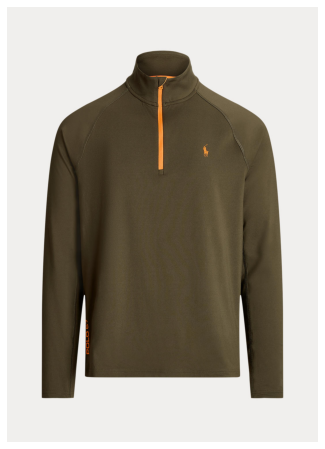

In [15]:
image_cl = load_rgb(pic_cl)
show(image_cl)

In [16]:
picpic_peopl_cl = folder_people + 'image_0036.jpg'
image_ppl = load_rgb(picpic_peopl_cl)
print(picpic_peopl_cl)

/content/drive/MyDrive/Test_1/people/image_0036.jpg


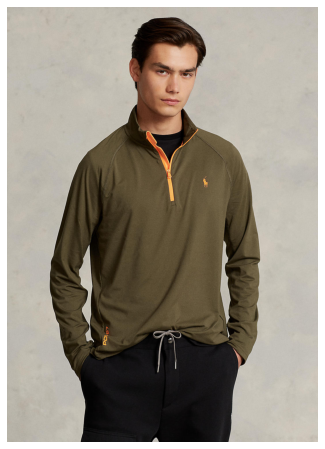

In [17]:
show(image_ppl)

In [153]:
padded_image_cl, pads = pad(image_cl, factor=32, border=cv2.BORDER_CONSTANT)
padded_image_ppl, pads = pad(image_ppl, factor=32, border=cv2.BORDER_CONSTANT)


# convert the numpy array to an image
img = Image.fromarray(padded_image_cl)
img.save("/content/clothes.jpg")

img = Image.fromarray(padded_image_ppl)
img.save("/content/people.jpg")

In [166]:
def segment_image_with_mask(image, mask):
    # load UNET
    model = create_model("Unet_2020-10-30")
    model.eval()

    # convert image and mask to tensors
    image_tensor = transforms.ToTensor()(image).unsqueeze(0)
    mask_tensor = transforms.ToTensor()(mask).unsqueeze(0)

    # segment the image with the mask
    with torch.no_grad():
        output = model(image_tensor)
        output = (output > 10).float()
        output = output * mask_tensor
        
    return output

/usr/local/lib/python3.8/dist-packages/torch/hub.py:651: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


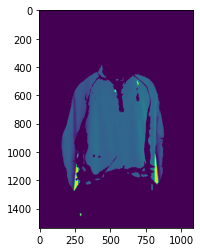

In [155]:
image = plt.imread('/content/people.jpg')
mask = plt.imread('/content/clothes.jpg')
output = segment_image_with_mask(image, mask)
plt.imshow(output[0][0], cmap=None)
plt.show()

In [156]:
mask = output[0][0].numpy()

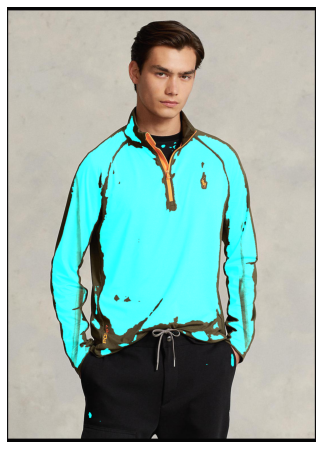

In [157]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 255)).astype(np.uint8), 5, 5)
show(dst)

In [158]:
gray_post_pic = (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255)

In [159]:
def normalize_array(arr):
    max_val = np.max(arr)
    return (arr / max_val * 255).astype(np.uint8)


In [160]:
norm_gray = normalize_array(gray_post_pic)

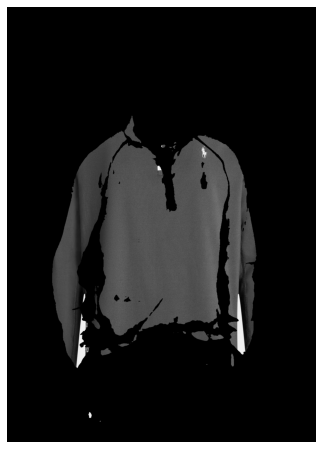

In [161]:
show(norm_gray)

In [162]:
def apply_mask_with_background(mask, image):
    masked_image = np.zeros_like(image)
    masked_image[mask != 0] = image[mask != 0]
    blue_background = np.zeros_like(image)
    blue_background[:] = (0, 0, 255)
    result = np.where(masked_image != 0, masked_image, blue_background)
    return result
bl = apply_mask_with_background(norm_gray, image)

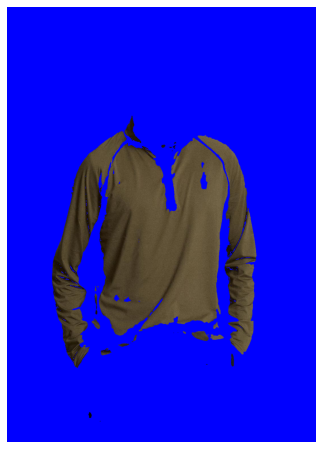

In [163]:
show(bl)

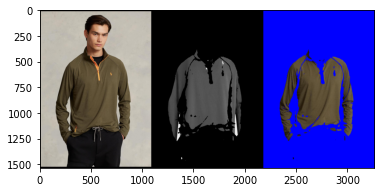

In [164]:
imshow(np.hstack([image, norm_gray, bl]))

## final function

In [7]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)


def show(img, cmap=None):
    """
    function to plot image
    """
    plt.figure(figsize=(14,8))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()


def segment_image_with_mask(image, mask):
    # load UNET
    model = create_model("Unet_2020-10-30")
    model.eval()

    # convert image and mask to tensors
    image_tensor = transforms.ToTensor()(image).unsqueeze(0)
    mask_tensor = transforms.ToTensor()(mask).unsqueeze(0)

    # segment the image with the mask
    with torch.no_grad():
        output = model(image_tensor)
        output = (output > 10).float()
        output = output * mask_tensor
        
    return output


def normalize_array(arr):
    max_val = np.max(arr)
    return (arr / max_val * 255).astype(np.uint8)



def apply_mask_with_background(mask, image):
    masked_image = np.zeros_like(image)
    masked_image[mask != 0] = image[mask != 0]
    blue_background = np.zeros_like(image)
    blue_background[:] = (0, 0, 255)
    result = np.where(masked_image != 0, masked_image, blue_background)
    return result


def cloth_mask_preprocessing(image_cl, image_ppl):
    padded_image_cl, pads = pad(image_cl, factor=32, border=cv2.BORDER_CONSTANT)
    padded_image_ppl, pads = pad(image_ppl, factor=32, border=cv2.BORDER_CONSTANT)

    img = Image.fromarray(padded_image_cl)
    img.save("/content/clothes.jpg")

    img = Image.fromarray(padded_image_ppl)
    img.save("/content/people.jpg")

    print('ready for preprocessing pictures are saved as people.jpg and clothes.jpg')

In [8]:
image = plt.imread('/content/people.jpg')
image_for_mask = plt.imread('/content/clothes.jpg')


def preprocess(cloth, cloth_mask):
    """
    function takes a cloth and a cloth_mask, the're supposed to be padded as
    it's done at the additional functions cell
    """

    output = segment_image_with_mask(cloth, cloth_mask)
    mask = output[0][0].numpy()
    dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 255)).astype(np.uint8), 5, 5)
    gray_post_pic = (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255)
    norm_gray = normalize_array(gray_post_pic)
    bl = apply_mask_with_background(norm_gray, image)

    imshow(np.hstack([image, norm_gray, bl]))
    
    # saving
    img = Image.fromarray(bl)
    img.save("/content/blue_background_cloth.jpg")
    print("blue_background_cloth_saved")

    return None


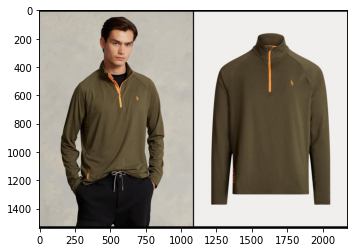

In [9]:
imshow(np.hstack([image, image_for_mask]))

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


blue_background_cloth_saved


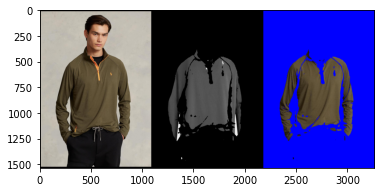

In [10]:
preprocess(image, image_for_mask)